In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [26]:
import os
import json
import pickle
from replay_buffer.ber import BlockReplayBuffer
from ray.rllib.utils.replay_buffers import ReplayBuffer

In [27]:
# Set the theme for the plot
sns.set_theme(style="whitegrid")

# Create a color palette
palette = sns.color_palette("colorblind", 4)

# Create a dictionary that maps each unique value to a color
palette_dict = dict(zip([1, 4, 8, 16], palette))

In [28]:
# {i:{} for i in os.listdir("/home/seventheli/JADE_checkpoints/")}

In [29]:
experiments = {
    'Boxing': {},
    'Defender': {},
    'Frostbite': {},
    'Asterix': {},
    'FishingDerby': {},
    'Asteroids': {},
    'BeamRider': {},
    'Carnival': {},
    'Amidar': {},
    'Freeway': {},
    'Assault': {},
    'SpaceInvaders': {},
    'BankHeist': {},
    'Berzerk': {},
    'Bowling': {},
    'BattleZone': {},
    'Atlantis': {},
    'Gopher': {},
    'CrazyClimber': {},
    'Centipede': {},
    'Qbert': {},
    'Breakout': {},
    'Alien': {},
    'ChopperCommand': {}}

configs = {
    'Boxing': {},
    'Defender': {},
    'Frostbite': {},
    'Asterix': {},
    'FishingDerby': {},
    'Asteroids': {},
    'BeamRider': {},
    'Carnival': {},
    'Amidar': {},
    'Freeway': {},
    'Assault': {},
    'SpaceInvaders': {},
    'BankHeist': {},
    'Berzerk': {},
    'Bowling': {},
    'BattleZone': {},
    'Atlantis': {},
    'Gopher': {},
    'CrazyClimber': {},
    'Centipede': {},
    'Qbert': {},
    'Breakout': {},
    'Alien': {},
    'ChopperCommand': {}}


In [30]:
for each in experiments.keys():
    path = os.path.join("/home/seventheli/JADE_loggings/", each)
    config = os.path.join("/home/seventheli/JADE_checkpoints/", each)
    for experiment in os.listdir(path):
        location = os.path.join(path, experiment)
        config_location = os.path.join(config, experiment)
        if len(os.listdir(location)) <= 100:
            print("<= 100: %s, %d" % (location, len(os.listdir(location))))
        else:
            if os.path.exists(os.path.join(config_location, experiment + "_config.pyl")):
                with open(os.path.join(config_location, experiment + "_config.pyl"), "rb") as f:
                    configs[each][experiment] = pickle.load(f)
                experiments[each][experiment] = []
                for file in os.listdir(location):
                    try:
                        with open(os.path.join(location, file), "r") as f:
                            experiments[each][experiment].append(json.load(f))
                    except:
                        print("error code: %s " % file)
            else:
                print("config not existing %s" % experiment)

<= 100: /home/seventheli/JADE_loggings/Asterix/APEX_DDQN_AsterixNoFrameskip-v4_DPER_514492, 0
<= 100: /home/seventheli/JADE_loggings/BeamRider/DDQN_PBER_BeamRiderNoFrameskip-v4_511133, 2
error code: 4740.json 
<= 100: /home/seventheli/JADE_loggings/BeamRider/DQN_ER_BeamRiderNoFrameskip-v4_20230721, 2
<= 100: /home/seventheli/JADE_loggings/Amidar/APEX_DDQN_AmidarNoFrameskip-v4_DPER_514491, 0
<= 100: /home/seventheli/JADE_loggings/Amidar/DDQN_PBER_AmidarNoFrameskip-v4_514401, 42
<= 100: /home/seventheli/JADE_loggings/Assault/DDQN_PBER_AssaultNoFrameskip-v4_514402, 42
<= 100: /home/seventheli/JADE_loggings/Assault/APEX_DDQN_AssaultNoFrameskip-v4_DPER_514493, 0
<= 100: /home/seventheli/JADE_loggings/SpaceInvaders/DDQN_PBER_SpaceInvadersNoFrameskip-v4_511136, 2
<= 100: /home/seventheli/JADE_loggings/SpaceInvaders/DQN_BER_SpaceInvadersNoFrameskip-v4_511134, 2
<= 100: /home/seventheli/JADE_loggings/SpaceInvaders/SpaceInvaders, 8
<= 100: /home/seventheli/JADE_loggings/Centipede/APEX_DDQN_Centi

In [31]:
selected = {
    'Boxing': [],
    'Defender': [],
    'Frostbite': [],
    'Asterix': [],
    'FishingDerby': [],
    'Asteroids': [],
    'BeamRider': [],
    'Carnival': [],
    'Amidar': [],
    'Freeway': [],
    'Assault': [],
    'SpaceInvaders': [],
    'BankHeist': [],
    'Berzerk': [],
    'Bowling': [],
    'BattleZone': [],
    'Atlantis': [],
    'Gopher': [],
    'CrazyClimber': [],
    'Centipede': [],
    'Qbert': [],
    'Breakout': [],
    'Alien': [],
    'ChopperCommand': []
}

In [32]:
for games in configs.keys():
    for experiment in configs[games]:
        _config = configs[games][experiment]
        if _config["replay_buffer_config"]["type"] == BlockReplayBuffer and experiment[0:3] == "DQN":
            selected[games].append([experiment, _config["replay_buffer_config"]["sub_buffer_size"]])
        elif _config["replay_buffer_config"]["type"] == ReplayBuffer and experiment[0:3] == "DQN":
            selected[games].append([experiment, 1])

In [33]:
sampler = {}
tags = ["episode_reward_max", "episode_reward_min", "episode_reward_mean", "episodes_this_iter"]

for each in selected.keys():
    _experiments = []
    for select in selected[each]:
        steps = []
        for info in experiments[each][select[0]]:
            _info = {
                **{i: info["sampler_results"][i] for i in tags},
                **info["counters"],
                **info["timers"],
                **{
                    "episodes_total": info["episodes_total"],
                    "training_iteration": info["training_iteration"],
                    "time_this_iter_s": info["time_this_iter_s"],
                    "time_total_s": info["time_total_s"]
                }
            }
            steps.append(_info)
        steps = pd.DataFrame(steps).sort_values("time_total_s")
        steps["size"] = select[1]
        steps["exp"] = select[0]
        _experiments.append(steps)
    if _experiments:
        sampler[each] = pd.concat(_experiments)

sampler = {key: sampler[key] for key in sorted(sampler)}

In [34]:
_all = pd.concat([x[1] for x in sampler.items()])
_all["env"] = _all["exp"].apply(lambda x: x.split("_")[2].replace("NoFrameskip-v4", ""))
_all = _all.value_counts(["exp", "env", "size"])
_all = _all.reset_index()
_all = _all.drop_duplicates(["exp", "size"]).sort_values("env")
_all = _all.reset_index(drop=True)
_all

exp            env  size  count
0            DQN_ER_AlienNoFrameskip-v4_514084          Alien     1   1682
1           DQN_BER_AlienNoFrameskip-v4_514082          Alien     8   1748
2          DQN_BER_AmidarNoFrameskip-v4_514083         Amidar     8   1349
3           DQN_ER_AmidarNoFrameskip-v4_514086         Amidar     1   1625
4          DQN_ER_AssaultNoFrameskip-v4_514087        Assault     1   1989
..                                         ...            ...   ...    ...
58   DQN_ER_SpaceInvadersNoFrameskip-v4_515656  SpaceInvaders     1   1004
59  DQN_BER_SpaceInvadersNoFrameskip-v4_511143  SpaceInvaders     4    365
60   DQN_ER_SpaceInvadersNoFrameskip-v4_512466  SpaceInvaders     1    377
61  DQN_BER_SpaceInvadersNoFrameskip-v4_512464  SpaceInvaders     8   1784
62  DQN_BER_SpaceInvadersNoFrameskip-v4_512468  SpaceInvaders     4   1795

[63 rows x 4 columns]

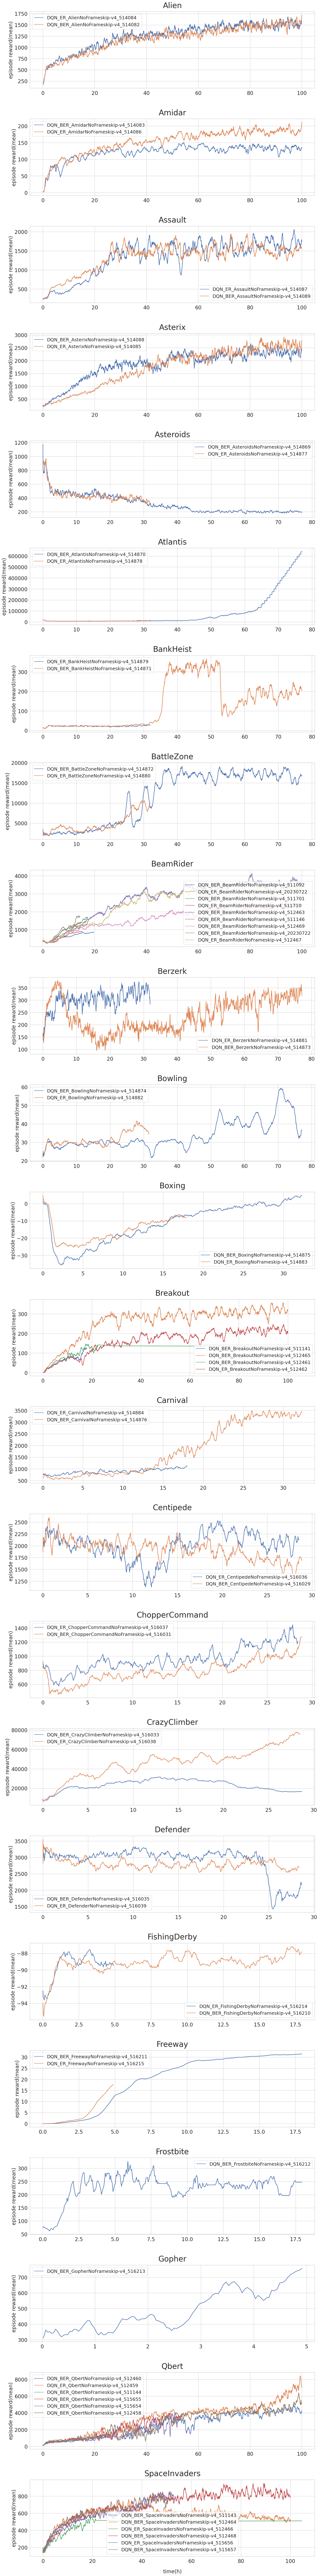

In [35]:
fig, axes = plt.subplots(len(sampler), 1, figsize=(20, 180), dpi=100)
for e, (k, data) in enumerate(sampler.items()):
    _data = data.copy()[["training_iteration", "num_env_steps_sampled", "time_total_s",
                         "episode_reward_max", "episode_reward_min", "episode_reward_mean",
                         "size", "exp"]]
    _data.columns = ["training iteration", "sampled frame", "time(s)",
                     "episode reward(max)", "episode reward(min)", "episode reward(mean)",
                     "size", "exp"]
    _data["sampled frame"] = _data["sampled frame"] * 4
    _data["time(h)"] = _data["time(s)"] / 3600
    ax = sns.lineplot(x="time(h)", y="episode reward(mean)", hue="exp",
                      data=_data.reset_index(drop=True), linewidth=2, ax=axes[e])
    ax.set_title(k, fontsize=30, y=1.03)
    ax.xaxis.set_tick_params(labelsize=20)
    ax.yaxis.set_tick_params(labelsize=20)

    # Show x-axis label only if it's the last subplot
    if e == len(sampler) - 1:
        ax.set_xlabel("time(h)", fontsize=20, labelpad=20)
    else:
        ax.set_xlabel(None)
    ax.set_ylabel("episode reward(mean)", fontsize=20)

    # Adjust legend properties if needed
    ax.legend(fontsize=18)

# Adjust the space between subplots
plt.subplots_adjust(hspace=0.4)

plt.show()
